<a href="https://colab.research.google.com/github/preto-fisico/Dupla55-Ciencia_de_Dados/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exibição dos Dados:

In [15]:
import pandas as pd
from IPython.display import display

# Caminho para o arquivo no Google Drive
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'

# Leia o arquivo CSV especificando o separador correto (;)
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

# Exibir 200 linhas do CSV
display(df.head(200))

# Salve o arquivo com o separador corrigido (,)
caminho_corrigido = '/content/drive/My Drive/projetounidade9/tabela_influenciadores_corrigido.csv'
df.to_csv(caminho_corrigido, index=False, sep=',')

print(f"Arquivo corrigido salvo em: {caminho_corrigido}")

# Contar valores vazios por coluna
valores_vazios = df.isnull().sum()

# Calcular o percentual de valores vazios por coluna
percentual_vazios = (valores_vazios / len(df)) * 100

# Exibir o total de linhas com valores vazios
total_linhas_vazias = df.isnull().any(axis=1).sum()

# Exibir os resultados
print("Contagem de valores vazios por coluna:")
print(valores_vazios)

print("\nPercentual de valores vazios por coluna (%):")
print(percentual_vazios)

print(f"\nTotal de linhas com valores vazios: {total_linhas_vazias} ({(total_linhas_vazias / len(df)) * 100:.2f}%)")



,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


Arquivo corrigido salvo em: /content/drive/My Drive/projetounidade9/tabela_influenciadores_corrigido.csv
Contagem de valores vazios por coluna:
rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

Percentual de valores vazios por coluna (%):
rank                  0.0
channel_info          0.0
influence_score       0.0
posts                 0.0
followers             0.0
avg_likes             0.0
60_day_eng_rate       0.0
new_post_avg_like     0.0
total_likes           0.0
country              31.0
dtype: float64

Total de linhas com valores vazios: 62 (31.00%)


Percentual de Linhas com  valores nulos = 31%
As variáveis (**avg_likes* e *new_post_avg_like**) mais correlacionadas no entanto apresentam 0% de valores nulos.

1 - Análise exploratória: Gráfico de correlação

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


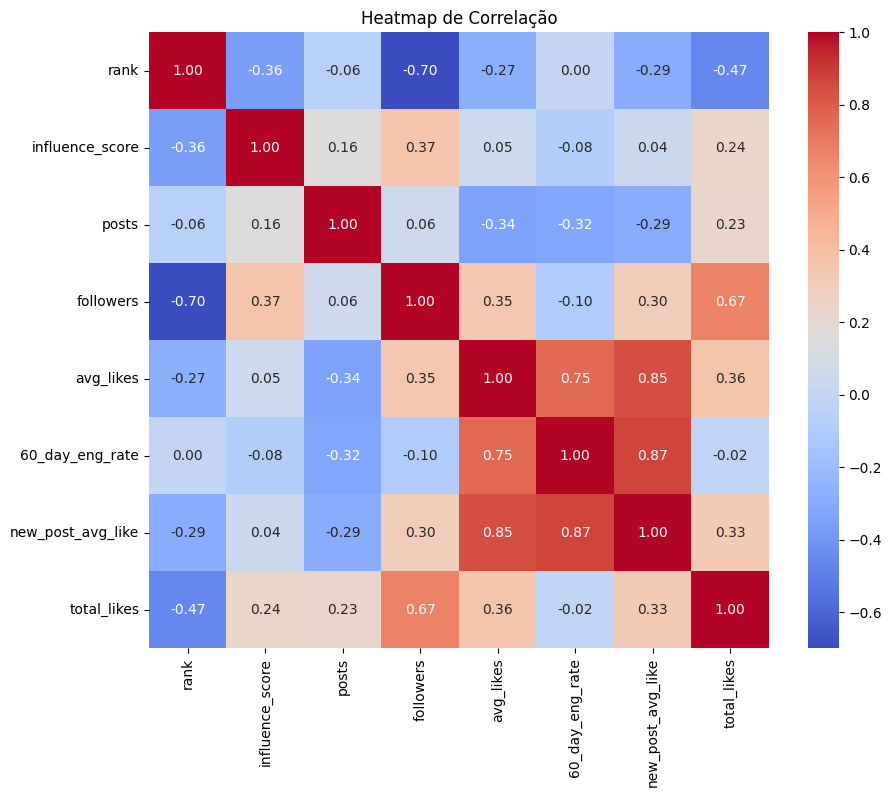

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho do arquivo no Google Drive
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'

# Carregar os dados
data = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

# Ajustar os dados (conversão de sufixos como k, m, b)
def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    return float(value)

columns_to_convert = ['posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
for col in columns_to_convert:
    if col in data.columns:
        data[col] = data[col].apply(convert_to_number)

# Gerar uma matriz de correlação, apenas para colunas numéricas
# O parâmetro numeric_only=True garante que apenas colunas numéricas sejam usadas
correlation_matrix = data.corr(numeric_only=True)

# Criar um heatmap usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de Correlação")
plt.show()